In [42]:
# https://www.youtube.com/watch?v=JqTASBiMVT8&ab_channel=EngineerHunter
import numpy as np
import matplotlib.pyplot as plt

# objective function (to be minimized)
def sphere_function(x):
    z = np.sum(np.square(x))
    return z

# Parameters
# H. A. Hefny and S. S. Azab, "Chaotic particle swarm optimization," 2010 The 7th International Conference on Informatics and Systems (INFOS), 2010, pp. 1-8.
swarm_size = 50
c1, c2 = 2.5, 2.5
iterMax = 1000  # Max iterations (Stopping criteria)
inertia_weight = 0.9 - ((0.9-0.4)/iterMax)*np.linspace(0, iterMax, iterMax)
xMin, xMax = -100, 100  # Initial position range
vMin, vMax = xMin, xMax  # Velocity limit (Nao entendi o uso do lambda)
d = 30  # Dimension
Result = np.zeros(iterMax) # Save Gbest values

def limit_velocity(V):
    for i in range(len(V)):
        if V[i] > vMax:
            V[i] = vMax
        if V[i] < vMin:
            V[i] = vMin
    return V

def limit_position(X):
    for i in range(len(X)):
        if X[i] > xMax:
            X[i] = xMax
        if X[i] < xMin:
            X[i] = xMin
    return X        

In [43]:
#%% PSO
# Kennedy, J., & Eberhart, R. (n.d.). Particle swarm optimization. Proceedings of ICNN’95 - International Conference on Neural Networks. doi:10.1109/icnn.1995.488968
def optimization():
    class particle():
        def __init__(self):
            self.position = np.random.uniform(xMin, xMax, [swarm_size,d])
            self.velocity = np.zeros([swarm_size,d])
            # self.velocity = np.random.uniform(vMin, vMax, [swarm_size,d])
            self.cost = np.zeros(swarm_size)
            self.cost[:] = sphere_function(self.position[:])
            self.pbest = np.copy(self.position)
            self.pbest_cost = np.copy(self.cost)
            self.index = np.argmin(self.pbest_cost)
            self.gbest = self.pbest[self.index]
            self.gbest_cost = self.pbest_cost[self.index]
            self.best_cost_iteration = np.zeros(iterMax)
        def evaluate(self):
            for i in range(iterMax):
                for ii in range(swarm_size):
                    self.velocity[ii] = (inertia_weight[i]*self.velocity[ii]
                                        +c1*np.random.rand(d)*(self.pbest[ii]-self.position[ii])
                                        +c2*np.random.rand(d)*(self.gbest-self.position[ii]))
                    self.velocity[ii] = limit_velocity(self.velocity[ii])
                    self.position[ii] = self.position[ii] + self.velocity[ii]
                    # self.position[ii] = limit_position(self.position[ii])
                    self.cost[ii] = sphere_function(self.position[ii])
                    if self.cost[ii] < self.pbest_cost[ii]:
                        self.pbest[ii] = self.position[ii]
                        self.pbest_cost[ii] = self.cost[ii]
                        if self.pbest_cost[ii] < self.gbest_cost:
                            self.gbest_cost = self.pbest_cost[ii]
                self.best_cost_iteration[i] = self.gbest_cost                        
        def plot(self):
            plt.semilogy(self.best_cost_iteration)
            plt.ylabel('Best function value')
            plt.xlabel('Number of iteration')            
            plt.title('PSO of sphere function')            
            print("Gbest", self.gbest_cost)                    
    a = particle()     
    a.evaluate()
    a.plot()

Gbest 35463.4201794997
Gbest 36190.00473659231
Gbest 33430.89762835827
Gbest 35773.356317201054
Gbest 32258.95854747776
Gbest 40861.77430561367
Gbest 32195.305558180808
Gbest 34686.55483422217
Gbest 29580.454154412007
Gbest 26648.292986871093
Gbest 36687.27252203311
Gbest 33232.28360776047
Gbest 25145.42331567012
Gbest 42220.283253740636
Gbest 35847.31483065264
Gbest 40428.716976556
Gbest 36376.81928433074
Gbest 33063.96011186358
Gbest 32241.5575463288
Gbest 31720.612509563434
Gbest 20128.147881567766
Gbest 40438.4299197228
Gbest 31189.58910941908
Gbest 25451.184211310552
Gbest 43464.99076688328
Gbest 44810.03520048603
Gbest 25219.45535007293
Gbest 34012.32377557438
Gbest 31705.936054728165
Gbest 41168.18264983209
Gbest 38078.102843440574
Gbest 31071.291490134994
Gbest 35795.291133829916
Gbest 26520.79813108886
Gbest 40740.035072396495
Gbest 24938.240840096765
Gbest 38467.66394092167
Gbest 49837.209357289554
Gbest 30869.772089524206
Gbest 40869.5667397518
Gbest 32936.9737493498
Gbest 3

KeyboardInterrupt: 

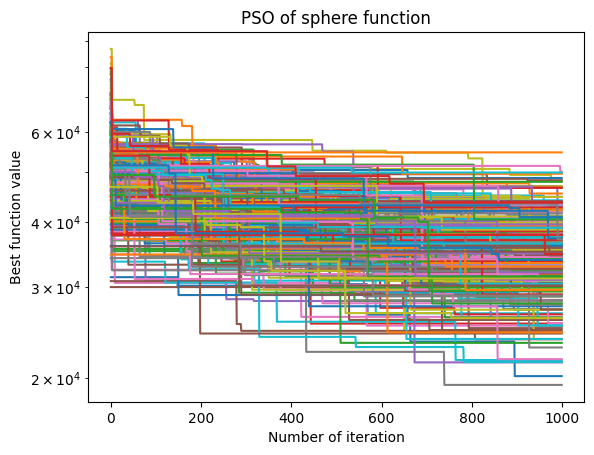

In [44]:
#%% Run
for i in range(iterMax):
    Gbest = optimization()   